In [146]:
import pandas as pd
from functions import get_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Get star data
df = pd.read_csv('../input/6 class csv.csv')
print(df.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


In [148]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB
None


In [149]:
print(df['Star type'].value_counts())

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


In [150]:
#(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
pd.unique(df['Star type'])

array([0, 1, 2, 3, 4, 5])

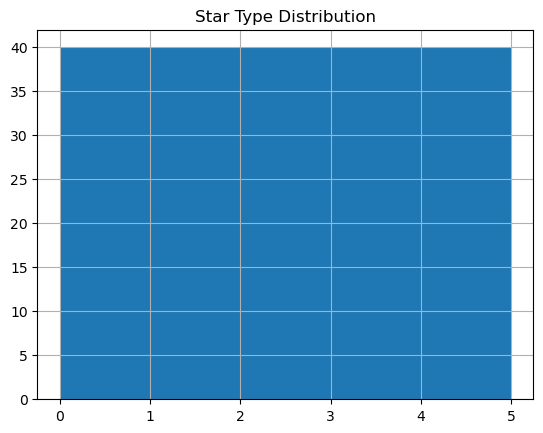

In [151]:
# Print distribution of star types. All even in this case (40 per star type)
df['Star type'].hist(bins=6)
plt.title('Star Type Distribution')
plt.show()

In [152]:
# Convert string columns to numbers for use in models
colour_codes, colour_uniques = pd.factorize(df['Star color'])
print(colour_codes, '\n', colour_uniques)

spectral_codes, spectral_uniques = pd.factorize(df['Spectral Class'])
print(spectral_codes, '\n', spectral_uniques)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  2  2
  1  3  4  3  3  5  6  7  7  8  9  8  9  9  9  9  0  0  0  0  0  0  0  0
  0  6  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 11  2 12  1  1  1  1  1 12 13  9 14 14 15  7  7
 16  9  7  6  6  6  6  6  6  6  6  6  6  6  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  6  1
 17  4  4 12  2  1  7 18  7  7  7  7  7  7  7  6  6  6  6  6  6  6  6  6
  6  6  0  0 10  6  0  0  6  7  7  7  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  6  6  6  6  6  6  6  6  6  6  7  7  7  7  6  6
  7  7  7  9  6  6  6  6  6  6  6  6  6  6  7  6  6  7  7  6  6  2  2  6] 
 Index(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish', 'yellow-white',
       'Orange', 'White-Yellow', 'white', 'Blue ', 'yellowish', 'Yellowish',
       'Orange-Red', 'Blue white ', 'Blue-

In [153]:
df['Star color'] = colour_codes
print(df['Star color'].head())

df['Spectral Class'] = spectral_codes
print(df['Spectral Class'].head())

0    0
1    0
2    0
3    0
4    0
Name: Star color, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Spectral Class, dtype: int64


In [154]:
# Map the string values to their codes for future reference
color_mapping = dict(enumerate(colour_uniques))
print(color_mapping)

spectral_mapping = dict(enumerate(spectral_uniques))
print(spectral_mapping)

{0: 'Red', 1: 'Blue White', 2: 'White', 3: 'Yellowish White', 4: 'Blue white', 5: 'Pale yellow orange', 6: 'Blue', 7: 'Blue-white', 8: 'Whitish', 9: 'yellow-white', 10: 'Orange', 11: 'White-Yellow', 12: 'white', 13: 'Blue ', 14: 'yellowish', 15: 'Yellowish', 16: 'Orange-Red', 17: 'Blue white ', 18: 'Blue-White'}
{0: 'M', 1: 'B', 2: 'A', 3: 'F', 4: 'O', 5: 'K', 6: 'G'}


In [155]:
# Get columns then split data into train and test sets
columns = df.columns.drop(['Star type','Spectral Class'])
print(columns)
X_train, X_test, y_train, y_test = train_test_split(df[columns],df['Star type'],test_size=0.33)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color'],
      dtype='object')


In [156]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6,4
236,30839,834042.000000,1194.0000,-10.63,5,6,4
237,8829,537493.000000,1423.0000,-10.73,5,2,2
238,9235,404940.000000,1112.0000,-11.23,5,2,2


In [158]:
# Train each model and keep track of scores in a dict
test_results = {}

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'KNN: {score}')
test_results['KNN'] = [score, knn]

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
score = tree.score(X_test, y_test)
print(f'Tree: {score}')
test_results['Tree'] = [score, tree]

lin = LogisticRegression()
lin.fit(X_train, y_train)
score = lin.score(X_test, y_test)
print(f'Linear: {score}')
test_results['Linear'] = [score, lin]

naive = GaussianNB()
naive.fit(X_train, y_train)
score = naive.score(X_test, y_test)
print(f'NB: {score}')
test_results['NB'] = [score, naive]

svc = LinearSVC()
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(f'SVC: {score}')
test_results['SVC'] = [score, svc]

KNN: 0.9875
Tree: 0.975
Linear: 0.95
NB: 0.975
SVC: 0.95


In [159]:
# Get the best performing model
max_model = max(test_results, key=lambda x: test_results[x][0])
model = test_results[max_model][1]

In [160]:
# Predict with the selected model
preds = model.predict(X_test)

In [161]:
print(y_test.to_list(),'\n',preds)

[0, 4, 4, 4, 5, 2, 3, 4, 5, 2, 5, 5, 4, 2, 4, 5, 0, 2, 4, 2, 0, 4, 3, 4, 1, 3, 5, 4, 1, 3, 5, 5, 0, 5, 2, 5, 5, 3, 5, 4, 2, 3, 3, 4, 0, 2, 5, 1, 3, 1, 1, 3, 1, 1, 0, 4, 4, 3, 1, 5, 0, 5, 5, 3, 5, 3, 5, 1, 5, 4, 5, 3, 0, 4, 0, 0, 4, 3, 1, 4] 
 [0 4 4 4 5 2 3 4 5 2 5 5 4 2 4 5 0 2 4 2 0 4 3 4 1 3 5 4 1 3 5 5 0 5 2 5 5
 3 5 4 2 3 3 4 0 2 5 1 4 1 1 3 1 1 0 4 4 3 1 5 0 5 5 3 5 3 5 1 5 4 5 3 0 4
 0 0 4 3 1 4]


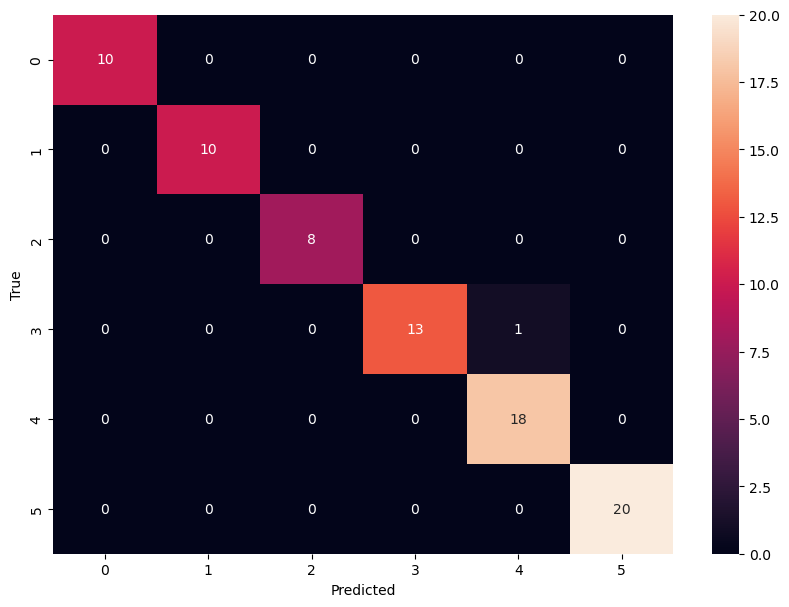

In [162]:
# Confusion matrix of the predictions
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [163]:
# Print scores with micro averaging
print(f'Precision: {precision_score(y_test, preds, average="micro")}')
print(f'Recall: {recall_score(y_test, preds, average="micro")}')
print(f'F1: {f1_score(y_test, preds, average="micro")}')

Precision: 0.9875
Recall: 0.9875
F1: 0.9875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


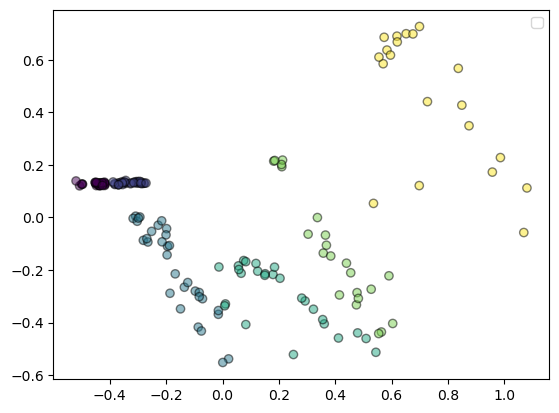

In [164]:
# Just for visuals
pca = PCA(2)
pca_df = pca.fit_transform(X_train)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.5)
plt.legend()
plt.show()